In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
cities

['rikitea',
 'fare',
 'mar del plata',
 'busselton',
 'dianopolis',
 'mnogovershinnyy',
 'hilo',
 'atuona',
 'vaini',
 'ushuaia',
 'hobart',
 'carnarvon',
 'semey',
 'waitati',
 'iqaluit',
 'karratha',
 'butaritari',
 'taolanaro',
 'vanimo',
 'arraial do cabo',
 'mataura',
 'mersin',
 'chunoyar',
 'longyearbyen',
 'new norfolk',
 'karonga',
 'tuktoyaktuk',
 'progreso',
 'jamestown',
 'skalistyy',
 'banda aceh',
 'hofn',
 'saint-philippe',
 'santa isabel do rio negro',
 'luderitz',
 'wenling',
 'pitimbu',
 'lensk',
 'ajdabiya',
 'murray',
 'bredasdorp',
 'brae',
 'castro',
 'airai',
 'kargasok',
 'broome',
 'bolungarvik',
 'yulara',
 'eyl',
 'souillac',
 'pavlovka',
 'espanola',
 'tasiilaq',
 'bethel',
 'illoqqortoormiut',
 'georgetown',
 'faanui',
 'albany',
 'rio grande',
 'fortuna',
 'punta arenas',
 'lompoc',
 'bilibino',
 'santiago de cao',
 'voyvozh',
 'barentsburg',
 'port alfred',
 'hokitika',
 'victoria',
 'sibu',
 'mtsamboro',
 'nanyang',
 'caravelas',
 'belushya guba',
 'sain

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval       ')
print('-------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Dat Loading is complete.
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | fare
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | dianopolis
City not found. Skipping...
Processing Record 6 of Set 1 | mnogovershinnyy
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | semey
Processing Record 14 of Set 1 | waitati
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | karratha
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | vanimo
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set

Processing Record 39 of Set 4 | biak
Processing Record 40 of Set 4 | yenagoa
Processing Record 41 of Set 4 | gasa
Processing Record 42 of Set 4 | camabatela
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | filadelfia
Processing Record 45 of Set 4 | makat
Processing Record 46 of Set 4 | suleja
Processing Record 47 of Set 4 | shangqiu
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | riachao das neves
Processing Record 50 of Set 4 | dwarka
Processing Record 1 of Set 5 | sompeta
Processing Record 2 of Set 5 | mana
Processing Record 3 of Set 5 | novyy urengoy
Processing Record 4 of Set 5 | sao desiderio
Processing Record 5 of Set 5 | pokrovsk
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | benalla
Processing Record 9 of Set 5 | udachnyy
Processing Record 10 of Set 5 | jalu
Processing Record 11 of Set 5 | talnakh
Processing Record 12 of Set 5 | tiassale
Processing Record 1

Processing Record 29 of Set 8 | kushiro
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | opuwo
Processing Record 32 of Set 8 | posadas
Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 35 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 36 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | sataua
City not found. Skipping...
Processing Record 39 of Set 8 | ureki
Processing Record 40 of Set 8 | taltal
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | jever
Processing Record 43 of Set 8 | oranjemund
Processing Record 44 of Set 8 | ust-ilimsk
Processing Record 45 of Set 8 | roseburg
Processing Record 46 of Set 8 | mayumba
Processing Record 47 of Set 8 | mandalgovi
Processing Record 48 of Set 8 | kennett
Processing Record 49 of Set 8 | bundaberg
Processing Record 50 of Set

Processing Record 15 of Set 12 | srivardhan
Processing Record 16 of Set 12 | hit
Processing Record 17 of Set 12 | dingle
Processing Record 18 of Set 12 | marrakesh
Processing Record 19 of Set 12 | tongchuan
Processing Record 20 of Set 12 | bam
Processing Record 21 of Set 12 | shushtar
Processing Record 22 of Set 12 | berberati
Processing Record 23 of Set 12 | menongue
Processing Record 24 of Set 12 | san policarpo
Processing Record 25 of Set 12 | upata
Processing Record 26 of Set 12 | broken hill
Processing Record 27 of Set 12 | kuche
City not found. Skipping...
Processing Record 28 of Set 12 | lianran
Processing Record 29 of Set 12 | calabozo
Processing Record 30 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | tecoanapa
Processing Record 33 of Set 12 | pirovskoye
Processing Record 34 of Set 12 | homer
Processing Record 35 of Set 12 | borogontsy
Processing Record 36 of Set 12 | marawi
Processing Record 37 of Set 12 | ha

In [11]:
len(city_data)

587

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,68.50,63,13,8.23,PF,2020-08-26 14:58:40
1,Fare,-16.70,-151.02,76.77,83,15,15.73,PF,2020-08-26 14:58:40
2,Mar Del Plata,-38.00,-57.56,60.80,93,90,6.93,AR,2020-08-26 14:58:40
3,Busselton,-33.65,115.33,54.00,73,100,2.82,AU,2020-08-26 14:58:40
4,Mnogovershinnyy,53.94,139.92,48.92,100,100,3.53,RU,2020-08-26 14:58:40
5,Hilo,19.73,-155.09,71.60,78,20,4.70,US,2020-08-26 14:54:35
6,Atuona,-9.80,-139.03,77.85,79,84,21.27,PF,2020-08-26 14:58:41
7,Vaini,-21.20,-175.20,64.40,100,20,4.70,TO,2020-08-26 14:58:41
8,Ushuaia,-54.80,-68.30,39.20,51,90,5.82,AR,2020-08-26 14:56:51
9,Hobart,-42.88,147.33,48.99,66,90,6.93,AU,2020-08-26 14:58:41


In [13]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-26 14:58:40,-23.12,-134.97,68.50,63,13,8.23
1,Fare,PF,2020-08-26 14:58:40,-16.70,-151.02,76.77,83,15,15.73
2,Mar Del Plata,AR,2020-08-26 14:58:40,-38.00,-57.56,60.80,93,90,6.93
3,Busselton,AU,2020-08-26 14:58:40,-33.65,115.33,54.00,73,100,2.82
4,Mnogovershinnyy,RU,2020-08-26 14:58:40,53.94,139.92,48.92,100,100,3.53
5,Hilo,US,2020-08-26 14:54:35,19.73,-155.09,71.60,78,20,4.70
6,Atuona,PF,2020-08-26 14:58:41,-9.80,-139.03,77.85,79,84,21.27
7,Vaini,TO,2020-08-26 14:58:41,-21.20,-175.20,64.40,100,20,4.70
8,Ushuaia,AR,2020-08-26 14:56:51,-54.80,-68.30,39.20,51,90,5.82
9,Hobart,AU,2020-08-26 14:58:41,-42.88,147.33,48.99,66,90,6.93


In [15]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [20]:
# Import the time module:
import time

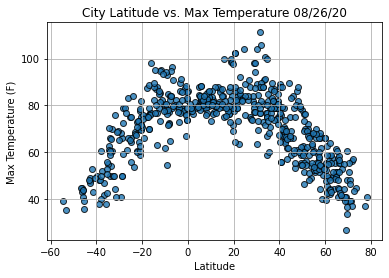

In [25]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

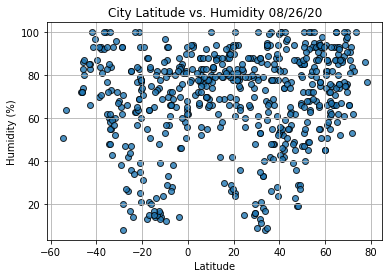

In [26]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

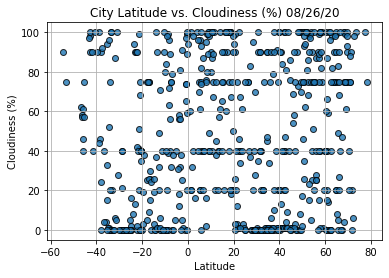

In [27]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

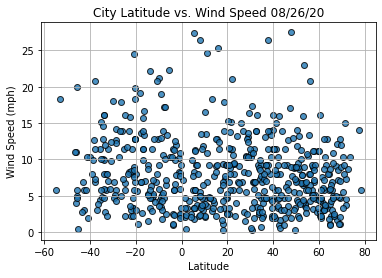

In [28]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()